In [1]:
import pandas as pd
df = pd.read_csv('dodag.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468060 entries, 0 to 468059
Data columns (total 18 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   time                                 468060 non-null  float64
 1   source                               468060 non-null  int64  
 2   destination                          468060 non-null  int64  
 3   length                               468060 non-null  float64
 4   info                                 468060 non-null  float64
 5   transmission_rate_per_1000_ms        468060 non-null  float64
 6   reception_rate_per_1000_ms           468060 non-null  float64
 7   transmission_average_per_sec         468060 non-null  float64
 8   reception_average_per_sec            468060 non-null  float64
 9   transmission_count_per_sec           468060 non-null  float64
 10  reception_count_per_sec              468060 non-null  float64
 11  transmission_

In [2]:
df.head()

,time,source,destination,length,info,transmission_rate_per_1000_ms,reception_rate_per_1000_ms,transmission_average_per_sec,reception_average_per_sec,transmission_count_per_sec,reception_count_per_sec,transmission_total_duration_per_sec,reception_total_duration_per_sec,dao,dis,dio,category,label
0,0.023,5,9999,0.0,0.0,1.000000,1.0,0.321947,0.0,1.000000,1.0,0.416877,0.0,0.0,0.0,1.000000,Dodag,1
1,0.024,8,9999,0.0,0.0,0.776751,1.0,0.308151,0.0,0.776751,1.0,0.393983,0.0,0.0,0.0,0.776751,Dodag,1
2,0.024,9,9999,0.0,0.0,0.764212,1.0,0.304484,0.0,0.764212,1.0,0.374588,0.0,0.0,0.0,0.764212,Dodag,1
3,0.024,1,9999,0.0,0.0,0.755007,1.0,0.336624,0.0,0.755007,1.0,0.400598,0.0,0.0,0.0,0.755007,Dodag,1
4,0.024,20,9999,0.0,0.0,0.764212,1.0,0.305202,0.0,0.764212,1.0,0.381593,0.0,0.0,0.0,0.764212,Dodag,1


In [3]:
# Check if 'label' is in the columns
if 'label' in df.columns:
    print(df['label'].value_counts())
else:
    print("'label' column does not exist in the DataFrame.")


0    297818
1    170242
Name: label, dtype: int64


data preprocessing

In [4]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE  # Import t-SNE
import pandas as pd

# Assuming df is your DataFrame containing the dataset

# Instantiate StandardScaler
scalar = StandardScaler()

# Drop the 'category' column
X = df.drop(['label', 'category'], axis=1)  # Drop both the target variable and the categorical column
y = df['label']  # Target variable

# Store column names
column_names = X.columns.tolist()

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=23)  # Assuming 2 components for visualization
X_embedded = tsne.fit_transform(X)

# Split the embedded data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_embedded, y, test_size=0.2, random_state=23)

# Check value counts of 'label' column before undersampling
print("Value counts of 'label' column before undersampling:")
print(y_train.value_counts())

# Instantiate the random sampler for undersampling
undersampler = RandomUnderSampler(random_state=42)

# Balance only the training set
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Check value counts of 'label' column after undersampling
print("\nValue counts of 'label' column after undersampling:")
print(pd.Series(y_train_resampled).value_counts())

# Scale the embedded data
X_scaled = scalar.fit_transform(X_embedded)

# Convert the scaled data back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=['TSNE_Component_1', 'TSNE_Component_2'])

# Display the first 10 rows of the scaled data
print("First 10 rows of the scaled data:")
print(X_scaled_df.head(10))


Value counts of 'label' column before undersampling:
0    238342
1    136106
Name: label, dtype: int64

Value counts of 'label' column after undersampling:
0    136106
1    136106
Name: label, dtype: int64
First 10 rows of the scaled data:
   TSNE_Component_1  TSNE_Component_2
0         -2.114285         -0.239400
1         -1.818542          0.092354
2         -1.876355          0.144892
3         -1.771270         -1.146231
4         -1.619826          1.085242
5         -1.405761          0.391927
6         -2.114340         -0.239377
7         -1.619855          1.085285
8         -1.876303          0.144899
9         -1.818551          0.092359


KNN

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_knn = knn_model.predict(X_test)


checking Accuracy

In [6]:
# Accuracy on the training set
train_accuracy = knn_model.score(X_train_resampled, y_train_resampled)
print("Training Accuracy:", train_accuracy)

# Accuracy on the test set
test_accuracy = knn_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.9611369079981779
Test Accuracy: 0.9362902192026663


In [7]:
import joblib
# Save the best model to disk
joblib.dump(knn_model, 'knn_dodag_model.pkl')

['knn_dodag_model.pkl']

              precision    recall  f1-score   support

           0       0.97      0.92      0.95     59476
           1       0.88      0.96      0.92     34136

    accuracy                           0.94     93612
   macro avg       0.93      0.94      0.93     93612
weighted avg       0.94      0.94      0.94     93612



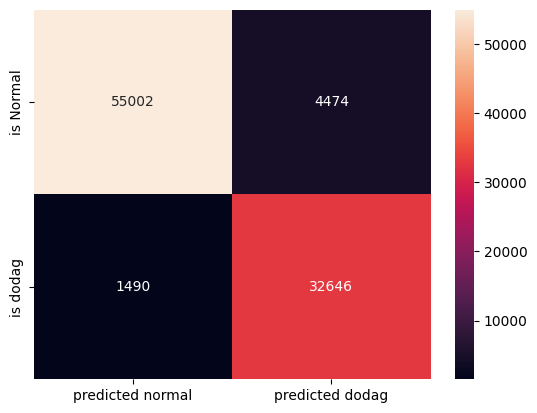

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns

# Make predictions using the best model
y_predict = knn_model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict, labels=[0, 1])

# Create DataFrame for confusion matrix
confusion = pd.DataFrame(conf_matrix, index=['is Normal', 'is dodag'], columns=['predicted normal', 'predicted dodag'])

# Visualize confusion matrix using heatmap
sns.heatmap(confusion, annot=True, fmt='d')

# Print classification report
print(classification_report(y_test, y_predict))


Correlation

In [9]:
import pandas as pd
import scipy.stats as stats

# Assuming your data is stored in a DataFrame called df
columns_of_interest = ['length', 'transmission_rate_per_1000_ms', 'reception_rate_per_1000_ms', 
                       'transmission_average_per_sec', 'reception_average_per_sec', 
                       'transmission_count_per_sec', 'reception_count_per_sec', 
                       'transmission_total_duration_per_sec', 'reception_total_duration_per_sec']

# Selecting only the numerical columns
numerical_data = df[columns_of_interest]

# Compute the Pearson correlation coefficient matrix
corr_matrix = numerical_data.corr()

# Display the correlation matrix
print(corr_matrix)


                                     length  transmission_rate_per_1000_ms  \
length                                  NaN                            NaN   
transmission_rate_per_1000_ms           NaN                       1.000000   
reception_rate_per_1000_ms              NaN                       0.701718   
transmission_average_per_sec            NaN                      -0.075702   
reception_average_per_sec               NaN                      -0.514274   
transmission_count_per_sec              NaN                       0.999955   
reception_count_per_sec                 NaN                       0.701411   
transmission_total_duration_per_sec     NaN                      -0.012152   
reception_total_duration_per_sec        NaN                       0.039810   

                                     reception_rate_per_1000_ms  \
length                                                      NaN   
transmission_rate_per_1000_ms                          0.701718   
reception_rate_per

In [10]:
# Compute the Spearman correlation coefficient matrix
spearman_corr_matrix = numerical_data.corr(method='spearman')

# Display the correlation matrix
print(spearman_corr_matrix)

                                     length  transmission_rate_per_1000_ms  \
length                                  NaN                            NaN   
transmission_rate_per_1000_ms           NaN                       1.000000   
reception_rate_per_1000_ms              NaN                       0.739283   
transmission_average_per_sec            NaN                      -0.395605   
reception_average_per_sec               NaN                      -0.460590   
transmission_count_per_sec              NaN                       0.999895   
reception_count_per_sec                 NaN                       0.739189   
transmission_total_duration_per_sec     NaN                       0.039195   
reception_total_duration_per_sec        NaN                       0.087872   

                                     reception_rate_per_1000_ms  \
length                                                      NaN   
transmission_rate_per_1000_ms                          0.739283   
reception_rate_per

In [11]:

# Compute the Kendall tau correlation coefficient matrix
kendall_corr_matrix = numerical_data.corr(method='kendall')

# Display the correlation matrix
print(kendall_corr_matrix)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:5278: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


                                     length  transmission_rate_per_1000_ms  \
length                                  1.0                            NaN   
transmission_rate_per_1000_ms           NaN                       1.000000   
reception_rate_per_1000_ms              NaN                       0.565961   
transmission_average_per_sec            NaN                      -0.290993   
reception_average_per_sec               NaN                      -0.339383   
transmission_count_per_sec              NaN                       0.996020   
reception_count_per_sec                 NaN                       0.565866   
transmission_total_duration_per_sec     NaN                       0.027086   
reception_total_duration_per_sec        NaN                       0.071966   

                                     reception_rate_per_1000_ms  \
length                                                      NaN   
transmission_rate_per_1000_ms                          0.565961   
reception_rate_per

In [12]:
import numpy as np

# Compute the correlation coefficient matrix
corr_matrix = np.corrcoef(numerical_data, rowvar=False)

# Display the correlation matrix
print(corr_matrix)

[[        nan         nan         nan         nan         nan         nan
          nan         nan         nan]
 [        nan  1.          0.70171759 -0.07570201 -0.51427399  0.99995528
   0.70141126 -0.0121519   0.03980954]
 [        nan  0.70171759  1.         -0.21107282 -0.72818662  0.70192539
   0.99998368  0.01804408  0.08123276]
 [        nan -0.07570201 -0.21107282  1.          0.35647624 -0.07596794
  -0.21106933  0.51278314  0.1989839 ]
 [        nan -0.51427399 -0.72818662  0.35647624  1.         -0.51460635
  -0.72837796  0.20930381  0.36708612]
 [        nan  0.99995528  0.70192539 -0.07596794 -0.51460635  1.
   0.70161615 -0.01226509  0.03966844]
 [        nan  0.70141126  0.99998368 -0.21106933 -0.72837796  0.70161615
   1.          0.01805492  0.08139446]
 [        nan -0.0121519   0.01804408  0.51278314  0.20930381 -0.01226509
   0.01805492  1.          0.26862693]
 [        nan  0.03980954  0.08123276  0.1989839   0.36708612  0.03966844
   0.08139446  0.26862693  1. 

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [13]:
import pandas as pd
corr_coefficient = df['length'].corr(df['transmission_rate_per_1000_ms'])
print("Correlation coefficient between column1 and column2:", corr_coefficient)


Correlation coefficient between column1 and column2: nan


In [14]:
spearman_corr = df['length'].corr(df['transmission_rate_per_1000_ms'], method='spearman')

kendall_corr = df['length'].corr(df['transmission_rate_per_1000_ms'], method='kendall')

print("Spearman correlation coefficient:", spearman_corr)
print("Kendall correlation coefficient:", kendall_corr)

Spearman correlation coefficient: nan
Kendall correlation coefficient: nan


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [15]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

print(correlation_matrix)


                                         time    source  destination  length  \
time                                 1.000000  0.021715          NaN     NaN   
source                               0.021715  1.000000          NaN     NaN   
destination                               NaN       NaN          NaN     NaN   
length                                    NaN       NaN          NaN     NaN   
info                                      NaN       NaN          NaN     NaN   
transmission_rate_per_1000_ms       -0.583407 -0.131720          NaN     NaN   
reception_rate_per_1000_ms          -0.605838 -0.020855          NaN     NaN   
transmission_average_per_sec         0.263733 -0.028044          NaN     NaN   
reception_average_per_sec            0.679549  0.021373          NaN     NaN   
transmission_count_per_sec          -0.584171 -0.131620          NaN     NaN   
reception_count_per_sec             -0.605443 -0.020857          NaN     NaN   
transmission_total_duration_per_sec  0.1

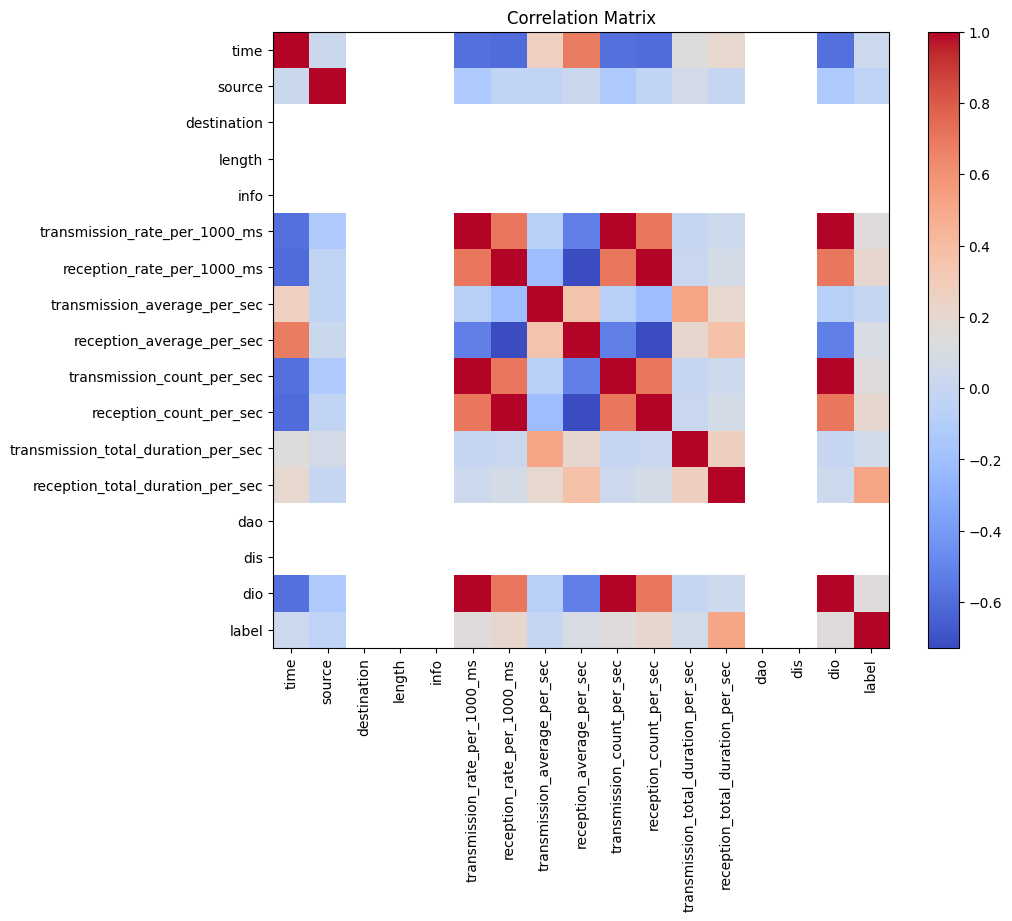

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix')
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()
